In [10]:
%matplotlib inline
import pandas as pd
from subprocess import call
import os

client_id = "dqn2"
logs_dir = "../" + client_id + "/logs"
ret = call(["aws", "s3", "sync", "s3://" + client_id + "/logs", logs_dir])


if ret != 0:
    print("Problem ", ret)
else:
    print("Downloaded!")

Downloaded!


In [11]:
import os
import pandas as pd
paths = [logs_dir + "/" + file_name for file_name in sorted(os.listdir(logs_dir))]

u = pd.Series()
for path in paths:
    u = pd.concat([u, pd.read_csv(path, sep='|', header=None, engine='python')])
len(u)

StopIteration: 

In [ ]:

log = pd.read_csv('log.out', sep="#").iloc[:,0]
rewards = log[log.str.startswith("Game reward: ")].str.extract('Game reward: (\d*)')
loss = log[log.str.startswith("loss:")].str.extract('loss:  (\d+\.\d+)').astype(float)
epsilon = log[log.str.startswith('epsilon:')].str.extract('epsilon:  (\d+\.\d+)').astype(float)

In [ ]:
pd.rolling_mean(rewards, 300).plot()

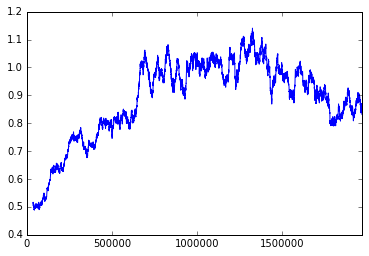

In [23]:
pd.rolling_mean(loss, 300).plot()

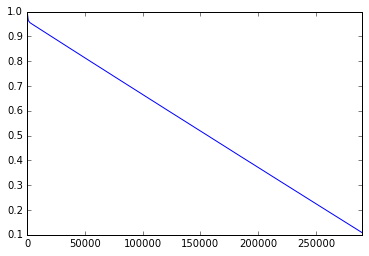

In [28]:
epsilon.plot()

In [114]:
ret = call(["./fetch_weights.sh"])
if ret != 0:
    print("Problem ", ret)